# HW2 - Plotting with `matplotlib`

**Spring 2020 | Python for Neuroscientists**


This HW will focus on plotting with the `matplotlib` library. We will use the coronavirus data, which can be downloaded as a csv file from the following Johns Hopkins University website. The data is updated daily here:

https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases

This data is simply cumulative confirmed cases for each country.

In [122]:
# pandas 
import pandas as pd

# matplotlib
import matplotlib.pyplot as plt

# seaborn
import seaborn as sns

# numpy
import numpy as np



## Load the csv file

Make sure that the csv file and the .ipynb are in the same directory

In [12]:
df = pd.read_csv('time_series_covid19_confirmed_global.csv') # this is pandas function

This loads a table, or pandas "dataframe." We will use pandas to extract data from the table. We can look at the contents of the table:

In [13]:
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,110,110,120,170,174,237,273,281,299,349
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,186,197,212,223,243,259,277,304,333,361
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,409,454,511,584,716,847,986,1171,1251,1320
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,267,308,334,370,376,390,428,439,466,501
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,4,5,7,7,7,8,8,8,10,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,NaN,Malawi,-13.254308,34.301525,0,0,0,0,0,0,...,0,0,0,0,0,0,3,3,4,4
258,Falkland Islands (Islas Malvinas),United Kingdom,-51.796300,-59.523600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Let's look at the stats for Italy

In [15]:
df_italy = df[df['Country/Region'] == 'Italy'] # this is one way to select Italy from the dataframe
df_italy.head() # this displays the 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
137,NaN,Italy,43.0,12.0,0,0,0,0,0,0,...,86498,92472,97689,101739,105792,110574,115242,119827,124632,128948


In [17]:
df_italy1 = df_italy.set_index('Country/Region', drop = True) # set pandas dataframe index to country
df_italy2 = df_italy1.drop(columns=['Lat','Long','Province/State'])

data_italy = df_italy2.loc['Italy','2/20/20':'4/5/20'] # select dates through April 5, 2020

Note that it would be cleaner to write the following:
> `df_italy = df_italy.set_index('Country/Region', drop = True)`

> `df_italy = df_italy.drop(columns=['Lat','Long','Province/State'])`

> `data_italy = df_italy.loc['Italy','2/20/20':'4/5/20']`

# Part 1: Plot the Data from Italy

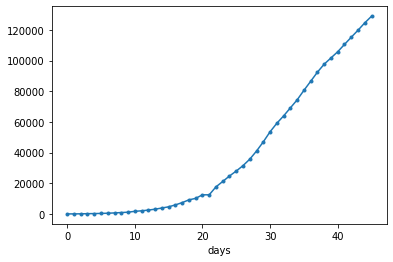

In [18]:
plt.plot(data_italy.values,'.-')
plt.xlabel('days')
plt.show()

## 1a Change the color of the line

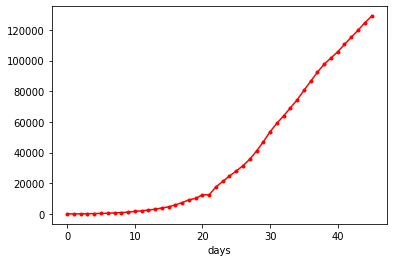

In [20]:
plt.plot(data_italy.values,'.-', color='r')
plt.xlabel('days')
plt.show()

## 1b Change the thickness of the line

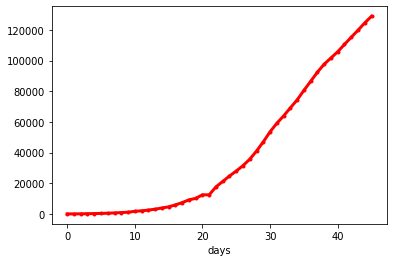

In [24]:
plt.plot(data_italy.values,'.-', color='r', linewidth='3')
plt.xlabel('days')
plt.show()

## 1c Add a label the y-axis

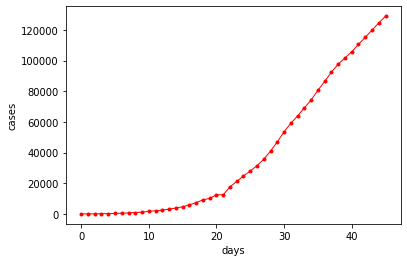

In [25]:
plt.plot(data_italy.values,'.-', color='r', linewidth='1')
plt.ylabel('cases')
plt.xlabel('days')
plt.show()

## 1d Add a title

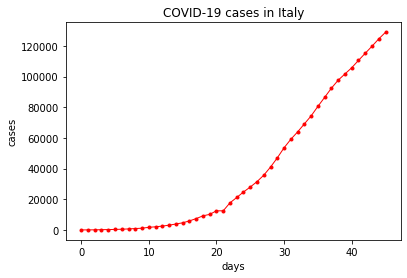

In [26]:
plt.plot(data_italy.values,'.-', color='r', linewidth='1')
plt.ylabel('cases')
plt.xlabel('days')
plt.title('COVID-19 cases in Italy')
plt.show()

## 1e Resize the figure
Note that we can plot with the calendar date using `data_italy.index`

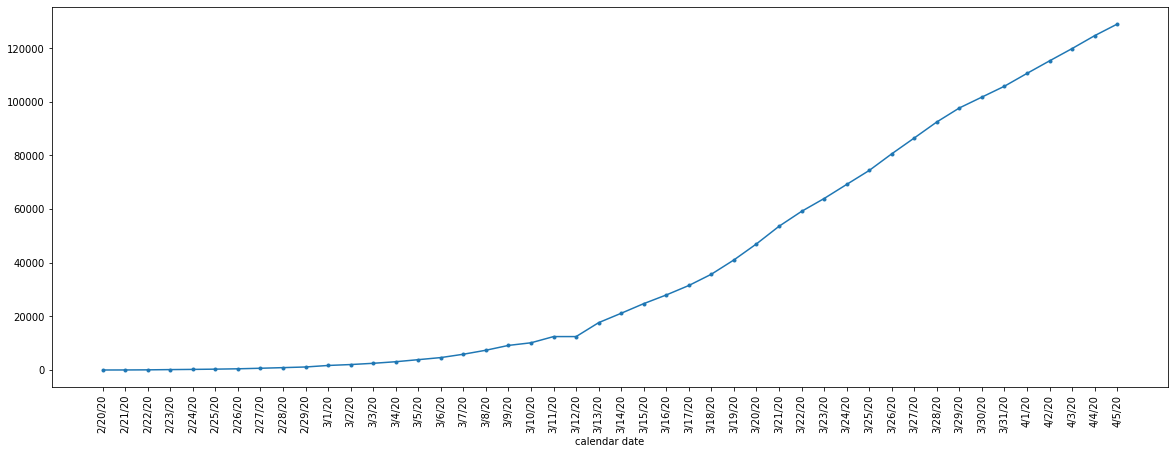

In [29]:

plt.figure(figsize=(20,7))

plt.plot(data_italy.index,data_italy.values,'.-')
plt.xticks(rotation=90) # rotate the xticks so text is not so tight
plt.xlabel('calendar date')
plt.show()

## Part 2: Plotting US and Italy Data

We can extract the data for the US from the dataframe

In [113]:
df_us = df[df['Country/Region'] == 'US']
df_us = df_us.set_index('Country/Region', drop = True) # set pandas dataframe index to country
df_us = df_us.drop(columns=['Lat','Long','Province/State'])

data_us = df_us.loc['US','2/20/20':'4/5/20']

## 2a: Plot Italy and US data in two axes

Use subplots and assign separate colors to each country. Set the same limits on the y-axis for both subplots

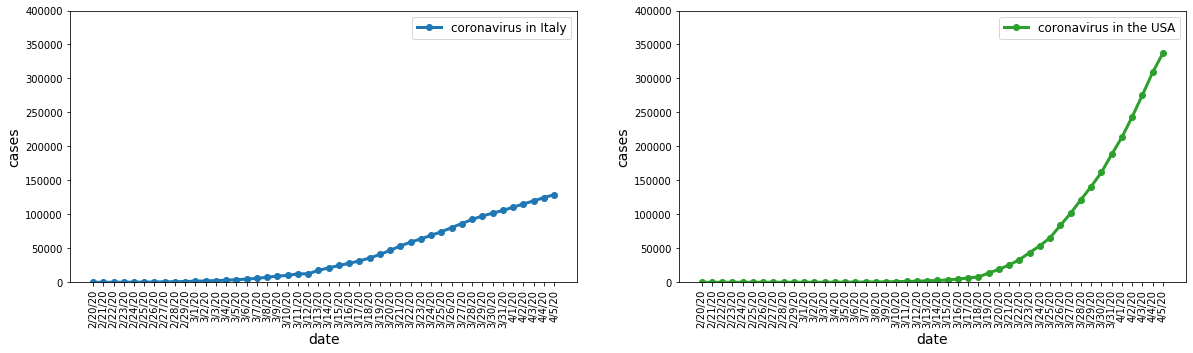

In [114]:
# use 
fig,ax = plt.subplots(1,2,figsize=(20,5)) # or whatever dimensions you like

ax[0].plot(data_italy.index,data_italy.values,'o-', color = 'C0',linewidth=3,label='coronavirus in Italy')
ax[1].plot(data_us.index, data_us.values,'o-', color = 'C2', linewidth=3,label='coronavirus in the USA') 

for a in ax:
    a.set_ylim(0,400000)
    a.set_xlabel('date',fontsize=14) # include font size
    a.set_ylabel('cases',fontsize=14)
    a.legend(fontsize=12)
    a.tick_params('x', labelrotation=90) 
plt.show()



## 2b: Plot Italy and US data in the same plot

Use the same colors as above, and include a legend

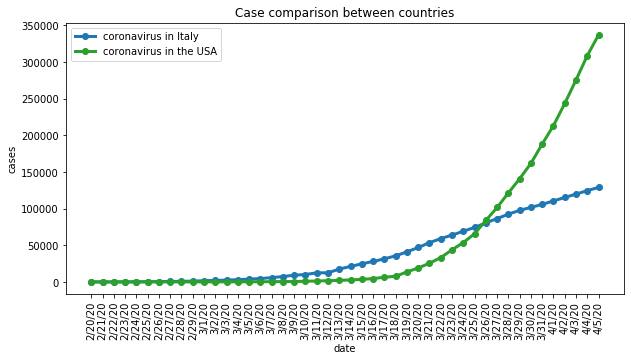

In [115]:
plt.figure(figsize=(10,5))

plt.plot(data_italy.index,data_italy.values,'o-', color = 'C0',linewidth=3,label='coronavirus in Italy')
plt.plot(data_us.index, data_us.values,'o-', color = 'C2', linewidth=3,label='coronavirus in the USA') 

plt.xticks(rotation=90) # rotate the xticks so text is not so tight
plt.xlabel('date')
plt.ylabel('cases')
plt.title("Case comparison between countries")
plt.legend()
plt.show()

## 2c Plot Italy and US data on log axis

Note that we only want the y-axis to be logarithmic

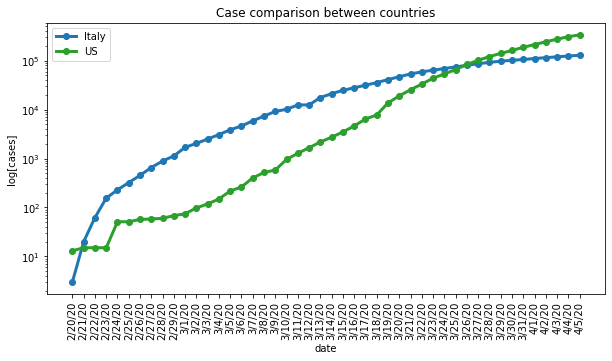

In [116]:
plt.figure(figsize=(10,5))

plt.plot(data_italy.index,data_italy.values,'o-', color = 'C0',linewidth=3,label=data_italy.name)
plt.plot(data_us.index, data_us.values,'o-', color = 'C2', linewidth=3,label=data_us.name) 

plt.xticks(rotation=90) # rotate the xticks so text is not so tight
plt.xlabel('date')
plt.ylabel('log[cases]')
plt.title("Case comparison between countries")
plt.yscale('log')
plt.legend()
plt.show()

## 2d Make the same plot as above, but using a `for` loop

In [117]:
data_all = {
    'Italy': data_italy,
    'US': data_us
}

colors = ['C0','C1','C2','C3','C4']

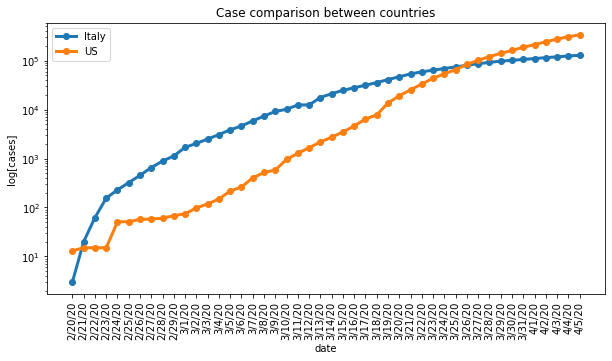

In [118]:
plt.figure(figsize=(10,5))

i = 0
for country in data_all.values():
    C = colors[i]
    plt.plot(country.index,country.values,'o-', color = C ,linewidth=3,label=country.name)
    i += 1
    
plt.xticks(rotation=90) # rotate the xticks so text is not so tight
plt.xlabel('date')
plt.ylabel('log[cases]')
plt.title("Case comparison between countries")
plt.yscale('log')
plt.legend()
plt.show()


## Part 3 Plot Data for 5 countries

Use a for loop, and include x/y labels and a legend. Also save your figure as a jpg and share with friends. You are now a Python datascientist

In [119]:
def selectData(Country,df):
    """ select data from a single country, for a given time interval """

    df_country = df[df['Country/Region'] == Country]
    df_country = df_country.set_index('Country/Region', drop = True) # set pandas dataframe index to country
    df_country = df_country.drop(columns=['Lat','Long','Province/State'])

    data_country = df_country.loc[Country,'2/20/20':'4/5/20']
    return(data_country)


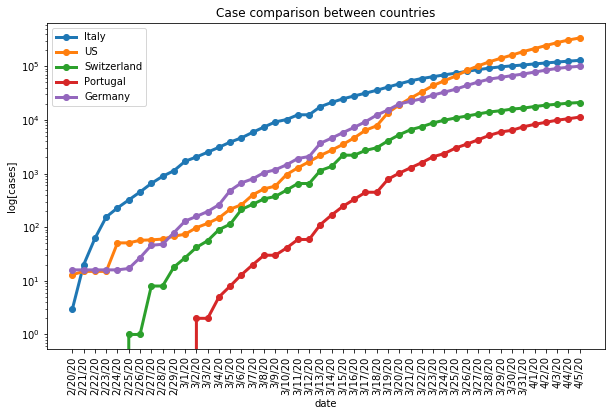

In [120]:
data_CH = selectData('Switzerland',df)
data_Port = selectData('Portugal',df)
data_Germ = selectData('Germany',df)

data_all = {
    'Italy': data_italy,
    'US': data_us,
    'Switzerland': data_CH,
    'Portugal': data_Port,
    'Germany': data_Germ
}

fig = plt.figure(figsize=(10,6))

i = 0
for country in data_all.values():
    C = colors[i]
    plt.plot(country.index,country.values,'o-', color = C ,linewidth=3,label=country.name)
    i += 1
    
plt.xticks(rotation=90) # rotate the xticks so text is not so tight
plt.xlabel('date')
plt.ylabel('log[cases]')
plt.title("Case comparison between countries")
plt.yscale('log')
plt.legend()
plt.show()

# save your figure
fig.savefig('ACM_5Countries_plot.jpg')

## Bonus: Seaborn

Plot whatever you like using seaborn

In [123]:

df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))

df

,time,value
0,0,-0.718389
1,1,-1.944372
2,2,-1.632856
3,3,-0.571989
4,4,-0.326746
...,...,...
495,495,17.116297
496,496,18.031361
497,497,16.949827
498,498,16.444338


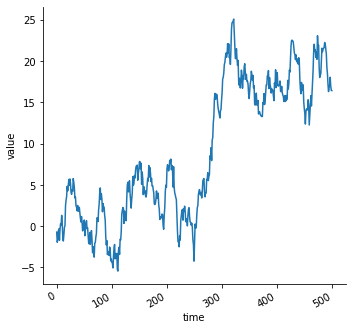

In [124]:

g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

